In [1]:
# Setup environment for all following codes
import os
import sys
nb_dir = os.path.abspath('../../../')
if nb_dir not in sys.path:
    sys.path.insert(0, nb_dir)

nb_dir

'/home/gustavosouza/Documents/Per/path-planning'

In [2]:
# Import everything necessary

import re
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import pickle
import itertools

from pathlib import Path as PPath
from multiprocessing import Pool

from src.chance_constraint.model import CartesianPoint, Mapa
from src.chance_constraint.visualization import plot_map, vis_mapa

from src.chance_constraint.genetic import Genetic, Subject

from reports.helper import read_bonus, separate_areas, sgl_read_areas, read_sgl, run_ags_over_path, get_specific, plot_fitness, get_parameter, make_globals

In [3]:
# Define Paths

MAPS_PATH = nb_dir + "/data/maps/SGL/NonRegular/"
RESULTS_PATH = nb_dir + "/experiments/results"

BONUS_PATH = nb_dir + "/data/maps/b_n/bonus_regions.txt"

In [4]:
# Set Origin and Destination waypoints

wp_ori = CartesianPoint(0, 0)
wp_des = CartesianPoint(0, -10)

labels = read_bonus(BONUS_PATH)


In [5]:
def run_multiple():
    pathlist = PPath(MAPS_PATH).glob("**/*.sgl")

    # Iterate over different maps in parallel
    par_RC = get_parameter(MODE)
    make_globals(labels, wp_ori, wp_des, par_RC, EXPERIMENTS_PATH, MODE, EXEC)
    p = Pool(processes=50)
    p.map(run_ags_over_path, pathlist)

1. Processing file: 27
{'inflation_rate': 0.1, 'bonus_index': [2, 0, 8, 17]}
1.1. Read
planning_mode=chance_constraint
2. AG generated: 27
2. Saved: 27


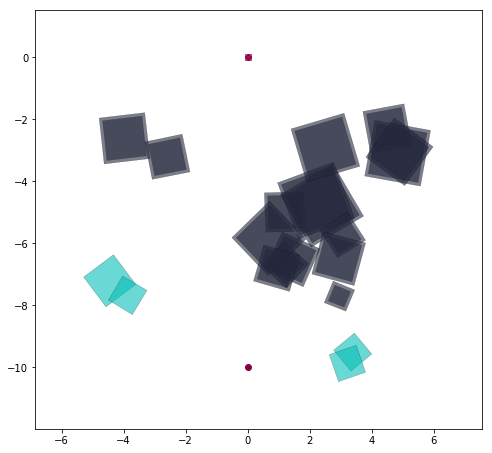

In [6]:
# This generates the figure from the same problem as Figure 8
# It takes 3 minutes to run.


# Use this cell to run a single file and show the output result

MODE = "CCC"
EXEC = "1"

mapa_name = "27"

par_RC = get_parameter(MODE)
make_globals(labels, wp_ori, wp_des, par_RC, RESULTS_PATH, MODE, EXEC)
ag = run_ags_over_path(MAPS_PATH + mapa_name + ".sgl", show=True)